In [1]:
# Set global seed
from numpy.random import seed
seed(42)

In [2]:
# Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [4]:
# Assign X (data) and y (target)
X = heart.drop("cardio", axis=1)
y = heart["cardio"].values.reshape(-1, 1)
print(X.shape, y.shape)

(68606, 20) (68606, 1)


In [5]:
# Set up train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
# Preprocess with Scaler
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [7]:
# Scale train and test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

X_train_scaled = X_train_scaled.reshape([51454, 20])

from sklearn.preprocessing import LabelEncoder
y_train_encoded = LabelEncoder().fit_transform(y_train_scaled)
y_test_encoded = LabelEncoder().fit_transform(y_test_scaled)

C:\Users\kenda\anaconda\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)
y_train_categorical

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [9]:
# Define the model
from tensorflow.keras.models import Sequential

model = Sequential()

In [10]:
# Define first layer input shape
X_shape = X_train.shape
X_shape

(51454, 20)

In [11]:
# Add first layer
from tensorflow.keras.layers import Dense
model.add(Dense(units=6, activation='relu', input_shape=X_shape[1:]))

In [12]:
# Add Output
model.add(Dense(units=2, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Fit (train) the model
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Train on 51454 samples
Epoch 1/1000
51454/51454 - 3s - loss: 0.5804 - accuracy: 0.7071
Epoch 2/1000
51454/51454 - 2s - loss: 0.5517 - accuracy: 0.7310
Epoch 3/1000
51454/51454 - 2s - loss: 0.5488 - accuracy: 0.7321
Epoch 4/1000
51454/51454 - 2s - loss: 0.5477 - accuracy: 0.7320
Epoch 5/1000
51454/51454 - 2s - loss: 0.5471 - accuracy: 0.7325
Epoch 6/1000
51454/51454 - 2s - loss: 0.5468 - accuracy: 0.7319
Epoch 7/1000
51454/51454 - 2s - loss: 0.5465 - accuracy: 0.7323
Epoch 8/1000
51454/51454 - 2s - loss: 0.5462 - accuracy: 0.7335
Epoch 9/1000
51454/51454 - 2s - loss: 0.5459 - accuracy: 0.7334
Epoch 10/1000
51454/51454 - 2s - loss: 0.5458 - accuracy: 0.7337
Epoch 11/1000
51454/51454 - 2s - loss: 0.5455 - accuracy: 0.7329
Epoch 12/1000
51454/51454 - 2s - loss: 0.5453 - accuracy: 0.7327
Epoch 13/1000
51454/51454 - 2s - loss: 0.5450 - accuracy: 0.7329
Epoch 14/1000
51454/51454 - 2s - loss: 0.5450 - accuracy: 0.7327
Epoch 15/1000
51454/51454 - 2s - loss: 0.5448 - accuracy: 0.7339
Epoch 16/10

In [16]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

17152/1 - 1s - loss: 0.5713 - accuracy: 0.7288
Loss: 0.5501834759071692, Accuracy: 0.7288362979888916


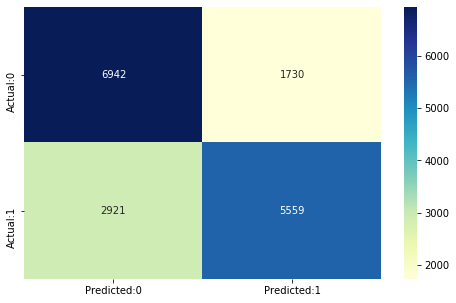

In [22]:
# Perform Confusion matrix on NN
predictions = model.predict(X_test_scaled)

import numpy as np
y_rounded=np.argmax(y_test_categorical, axis=1)
pred_rounded = np.argmax(predictions, axis=1)

from sklearn.metrics import confusion_matrix
import seaborn as sn
cm=confusion_matrix(y_rounded,pred_rounded)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")